In [1]:
import pandas as pd
import IPython.display as ipd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.utils import shuffle
from smds import SMDS
import numpy as np
from keras.src import models, layers
from utils import TestModel, min_max_scaling
from score import Audio
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./data/gtzan/features_30_sec.csv")
genres = data[["filename", "label"]]
ipd.display(data)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,...,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,rock
996,rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,...,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock
997,rock.00097.wav,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,...,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock
998,rock.00098.wav,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,...,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088,rock


In [3]:
Y = data["label"]
# le = LabelEncoder()
# le.fit(Y)
# Y = le.transform(Y)

In [4]:
smd = SMDS()
smd_data = smd.load("./data/smds/smds.csv")
ipd.display(smd_data)

n_mfcc                           0                                             \
stat                      kurtosis       max       mean     median        min   
id  filename        tick                                                        
0   blues.00000.wav 0    -0.921429 -0.602207  -4.116866  -4.102283  -7.520702   
                    1    -1.034314 -1.877029  -7.598314  -7.186878 -13.353165   
                    2    -1.572501 -0.969917  -4.778881  -5.134876  -8.422367   
                    3    -0.464004 -6.557148 -19.352211 -13.589458 -44.356602   
                    4    -1.543346 -3.608807  -9.907966 -11.096891 -15.579109   
...                            ...       ...        ...        ...        ...   
999 rock.00099.wav  125  -1.668841 -6.418808  -8.240566  -8.720350  -9.642128   
                    126  -0.565443 -6.335140  -7.947320  -8.316345  -8.830395   
                    127  -1.263555 -7.196236  -7.737393  -7.752090  -8.294815   
                    128  -0.988667 -6.559055  -7.195686  -7.254095  -7.784954   
                    129   0.269860  0.000000  -1.463675   0.000000  -7.539124   

n_mfcc                                                1                        \
stat                          skew        std  kurtosis        max       mean   
id  filename        tick                                                        
0   blues.00000.wav 0     0.075946   2.036903  0.772538  -5.987366  -7.507081   
                    1    -0.174034   3.668512  0.112355  -4.566875  -5.301490   
                    2     0.114478   2.887686 -1.140482  -5.294666  -6.178790   
                    3    -1.017900  13.109632 -0.113993  -5.659710  -6.246984   
                    4     0.186728   4.365551 -0.444909  -5.034054  -6.183269   
...                            ...        ...       ...        ...        ...   
999 rock.00099.wav  125   0.288957   1.312025 -1.685759 -11.284740 -16.591238   
                    126   0.939037   0.814353  0.135143 -10.887753 -13.876005   
                    127   0.007978   0.383713  0.305037 -11.849773 -13.116172   
                    128   0.295401   0.383454 -0.891905 -12.233089 -13.124200   
                    129  -1.504257   2.929015  0.256183   0.000000  -2.852111   

n_mfcc                    ...         78                             79  \
stat                      ...        min      skew        std  kurtosis   
id  filename        tick  ...                                             
0   blues.00000.wav 0     ... -49.083920 -0.977847   5.134587 -1.160708   
                    1     ... -53.511654 -0.184655   5.826108 -1.315379   
                    2     ... -69.529617 -1.056008   8.996381  3.445230   
                    3     ... -59.234875  0.333952   6.306738 -0.488882   
                    4     ... -49.196671 -0.510006   5.263323  0.213930   
...                       ...        ...       ...        ...       ...   
999 rock.00099.wav  125   ... -54.167397 -0.335766   3.301470 -1.117706   
                    126   ... -80.000000 -1.005443  13.842562 -0.901133   
                    127   ... -69.031830 -0.722306   7.482690 -0.281512   
                    128   ... -61.854057  0.009870   6.562678 -0.681463   
                    129   ... -69.385315 -1.610976  24.341445  0.265864   

n_mfcc                                                                \
stat                            max       mean     median        min   
id  filename        tick                                               
0   blues.00000.wav 0    -35.698669 -43.202668 -43.486481 -49.926258   
                    1    -28.597214 -35.000878 -33.491056 -44.386990   
                    2    -34.679245 -42.391080 -40.910299 -66.542259   
                    3    -36.154251 -46.147050 -43.639938 -62.355431   
                    4    -30.756321 -46.553548 -42.001894 -78.969360   
...                             ...        ...        ...        ...   
999 rock.00099.wav  125  -41.10

In [5]:
def prepare_data(data: pd.DataFrame):
    grouped = data.groupby(by="id")
    
    cnn_data = [None]*len(grouped)
    ss = StandardScaler()
    for i, group in grouped:
        if i == 0: ss.fit(group)
        cnn_data[i] = ss.transform(group)
    cnn_data = np.expand_dims(cnn_data, axis=-1)
    return cnn_data
        

In [6]:
X = prepare_data(smd_data)
X, Y = shuffle(X, Y, random_state=1)

In [7]:
X.shape, Y.shape

((1000, 130, 560, 1), (1000,))

In [8]:
print(np.isnan(X).any())
print(np.isinf(X).any()) 
X = np.nan_to_num(X, nan=0.0, posinf=1.0, neginf=-1.0)  # 將 NaN 替換為 0，無窮大替換為合理的值
print(np.isnan(X).any())
print(np.isinf(X).any()) 

True
False
False
False


## Model 1

In [8]:
def model_1():
    input_dim = (130, 560)
    encoding_dim = 10
    
    input_layer = layers.Input(shape = input_dim)
    x = layers.Masking(0.)(input_layer)
    x = layers.Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
    x = layers.Flatten()(x)
    x = layers.Dense(32, activation='relu')(x)
    
    encoded = layers.Dense(encoding_dim, activation='relu')(x)
    
    # Decoder
    x = layers.Dense(32, activation='relu')(encoded)
    x = layers.Dense(130 * 64, activation='relu')(x)  # 先還原回原始 Conv1D 層的輸出形狀
    x = layers.Reshape((130, 64))(x)  # 將其 reshape 回 (sequence_length, num_filters)
    decoded = layers.Conv1D(filters=560, kernel_size=3, activation='sigmoid', padding='same')(x)

    encoder = models.Model(input_layer, encoded)
    autoencoder = models.Model(input_layer, decoded)
    
    return encoder, autoencoder

# Model - 1
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
# Model - 2
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
# Model - 3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


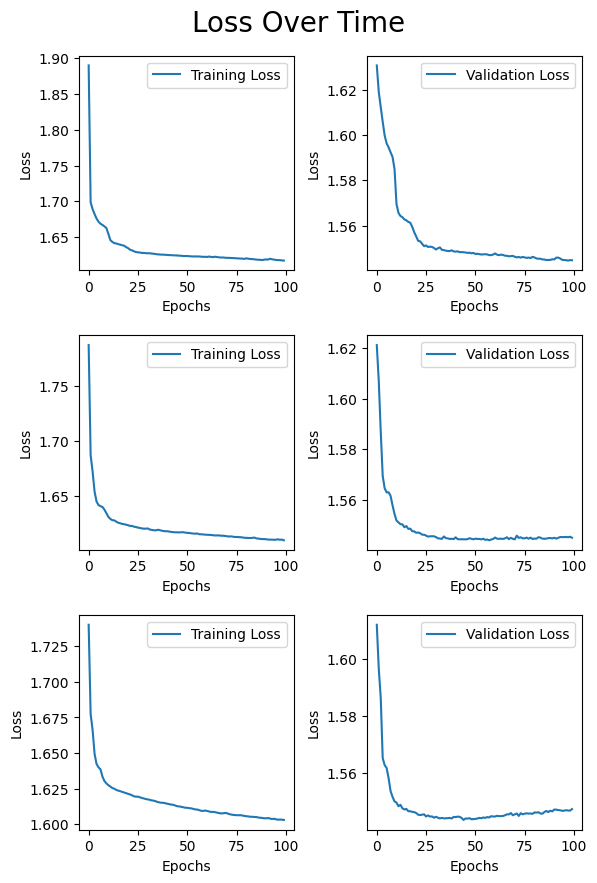

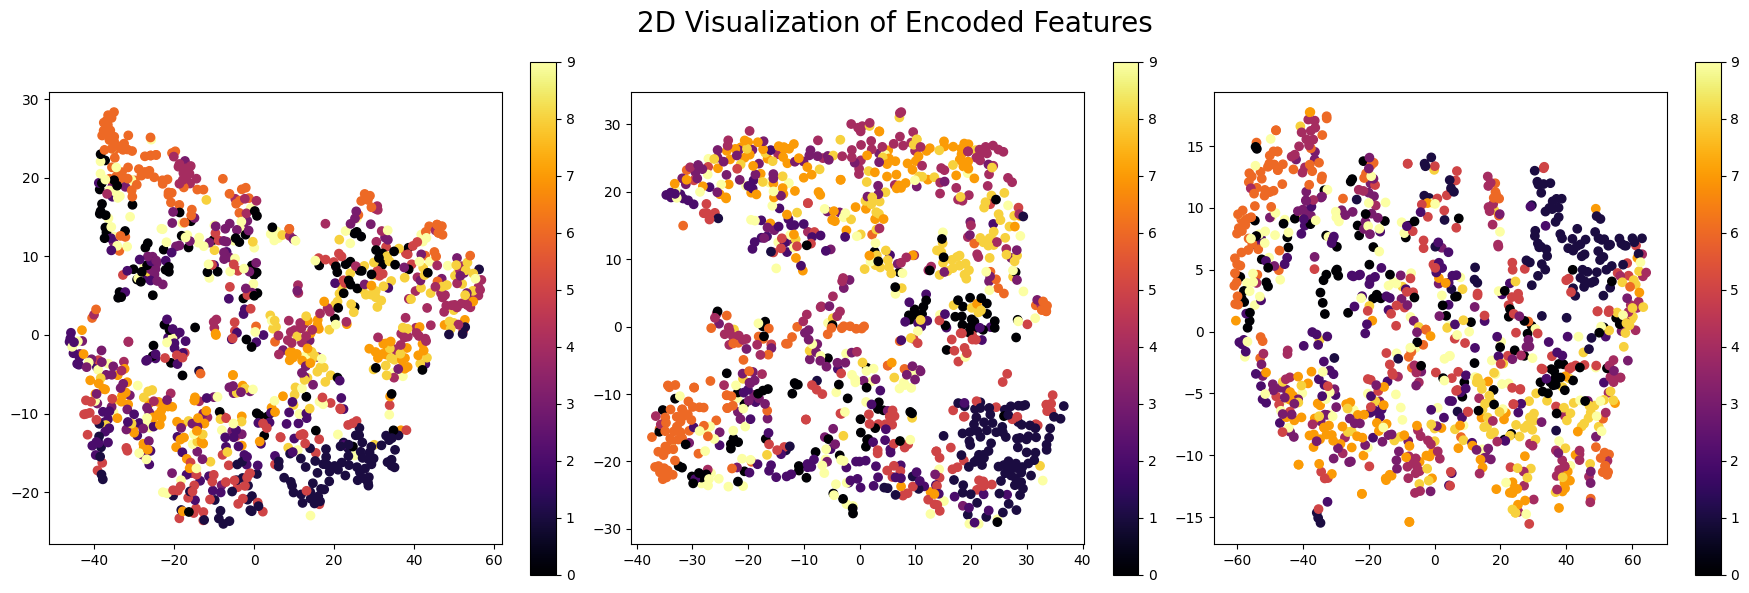

In [10]:
settings = (TestModel.ModelSettings(100, 64), TestModel.ModelSettings(100, 32), TestModel.ModelSettings(100, 16))
tm = TestModel(model_1, settings)
tm.test(X, X, validation_split=0.1, X_test=X, Y_test=Y, output_shape=10)

## Model 2

In [13]:
def model_2():
    input_dim = (130, 560)
    encoding_dim = 10
    
    input_layer = layers.Input(shape = input_dim)
    x = layers.Masking(0.)(input_layer)
    x = layers.Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
    x = layers.Conv1D(filters=32, kernel_size=3, activation='relu')(input_layer)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dense(16, activation='relu')(x)
    
    encoded = layers.Dense(encoding_dim, activation='relu')(x)
    
    # Decoder
    x = layers.Dense(32, activation='relu')(encoded)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(130 * 32, activation='relu')(x)  # 先還原回原始 Conv1D 層的輸出形狀
    x = layers.Reshape((130, 32))(x)  # 將其 reshape 回 (sequence_length, num_filters)
    decoded = layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(x)
    decoded = layers.Conv1D(filters=560, kernel_size=3, activation='sigmoid', padding='same')(x)

    encoder = models.Model(input_layer, encoded)
    autoencoder = models.Model(input_layer, decoded)
    
    return encoder, autoencoder

# Model - 1
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
# Model - 2
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
# Model - 3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


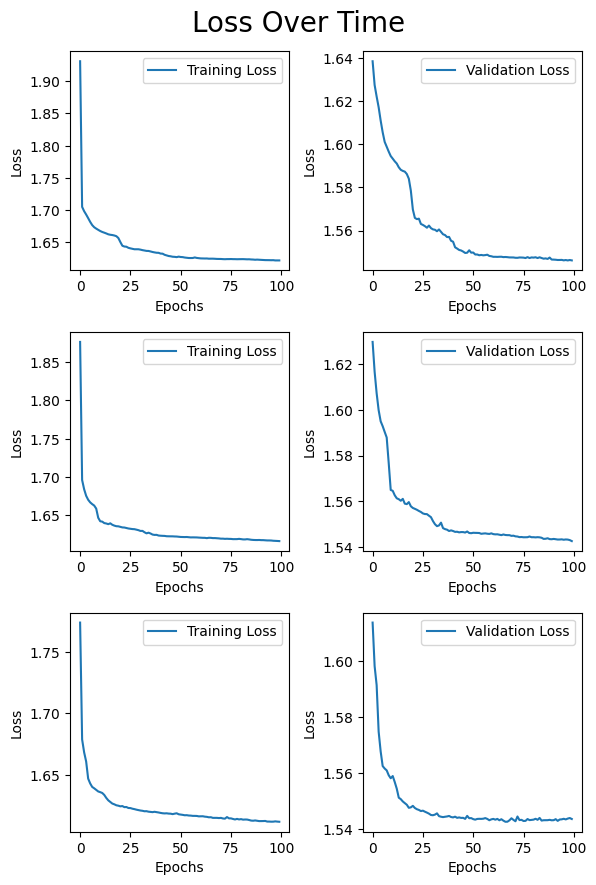

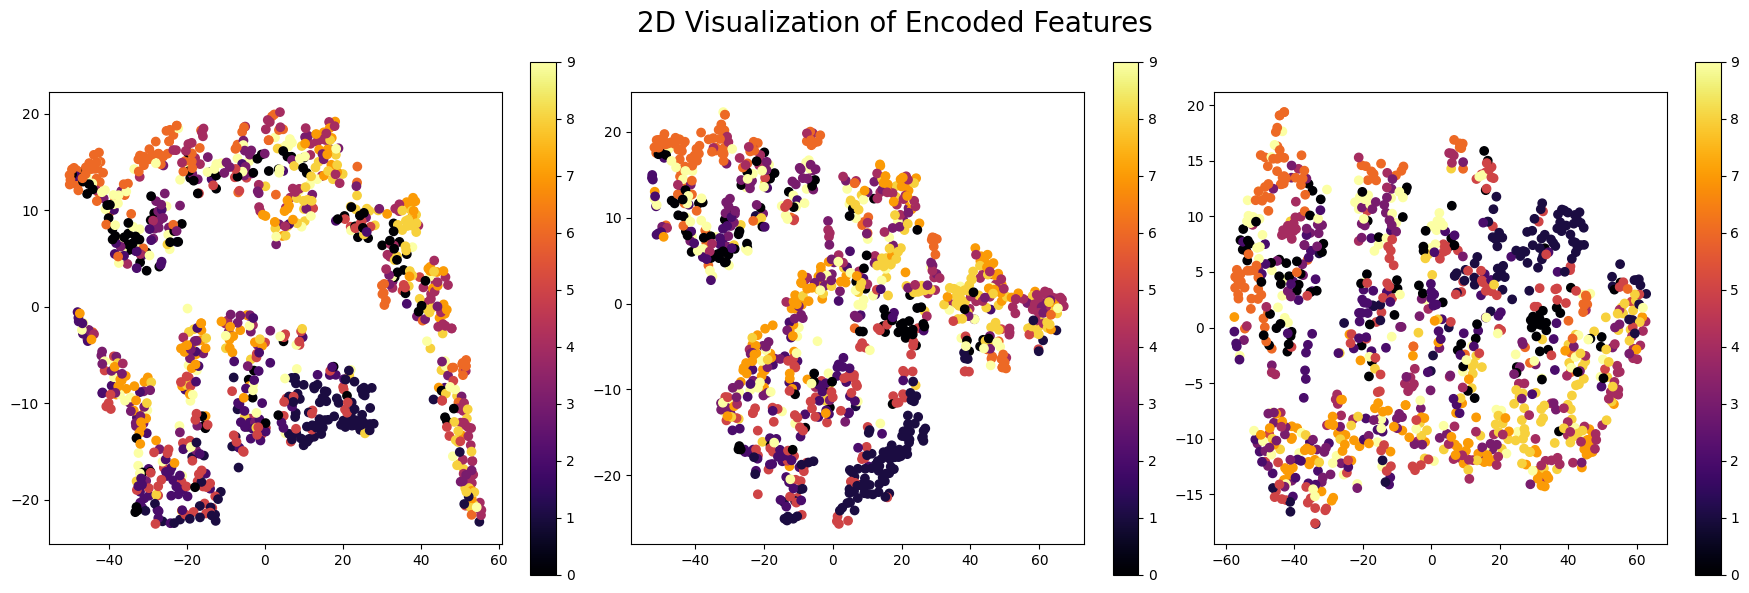

In [14]:
settings = (TestModel.ModelSettings(100, 64), TestModel.ModelSettings(100, 32), TestModel.ModelSettings(100, 16))
tm = TestModel(model_2, settings)
tm.test(X, X, validation_split=0.1, X_test=X, Y_test=Y, output_shape=10)

## Model 3

In [15]:
def model_3():
    input_dim = (130, 560)
    encoding_dim = 20
    
    input_layer = layers.Input(shape = input_dim)
    x = layers.Masking(0.)(input_layer)
    x = layers.Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
    x = layers.Conv1D(filters=32, kernel_size=3, activation='relu')(input_layer)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dense(16, activation='relu')(x)
    
    encoded = layers.Dense(encoding_dim, activation='relu')(x)
    
    # Decoder
    x = layers.Dense(32, activation='relu')(encoded)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(130 * 32, activation='relu')(x)  # 先還原回原始 Conv1D 層的輸出形狀
    x = layers.Reshape((130, 32))(x)  # 將其 reshape 回 (sequence_length, num_filters)
    decoded = layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(x)
    decoded = layers.Conv1D(filters=560, kernel_size=3, activation='sigmoid', padding='same')(x)

    encoder = models.Model(input_layer, encoded)
    autoencoder = models.Model(input_layer, decoded)
    
    return encoder, autoencoder

# Model - 1
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
# Model - 2
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
# Model - 3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


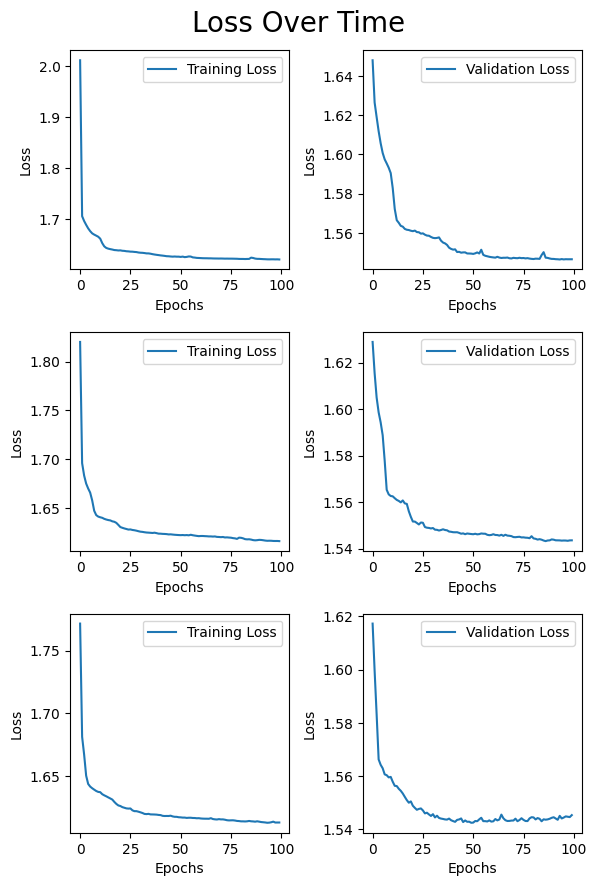

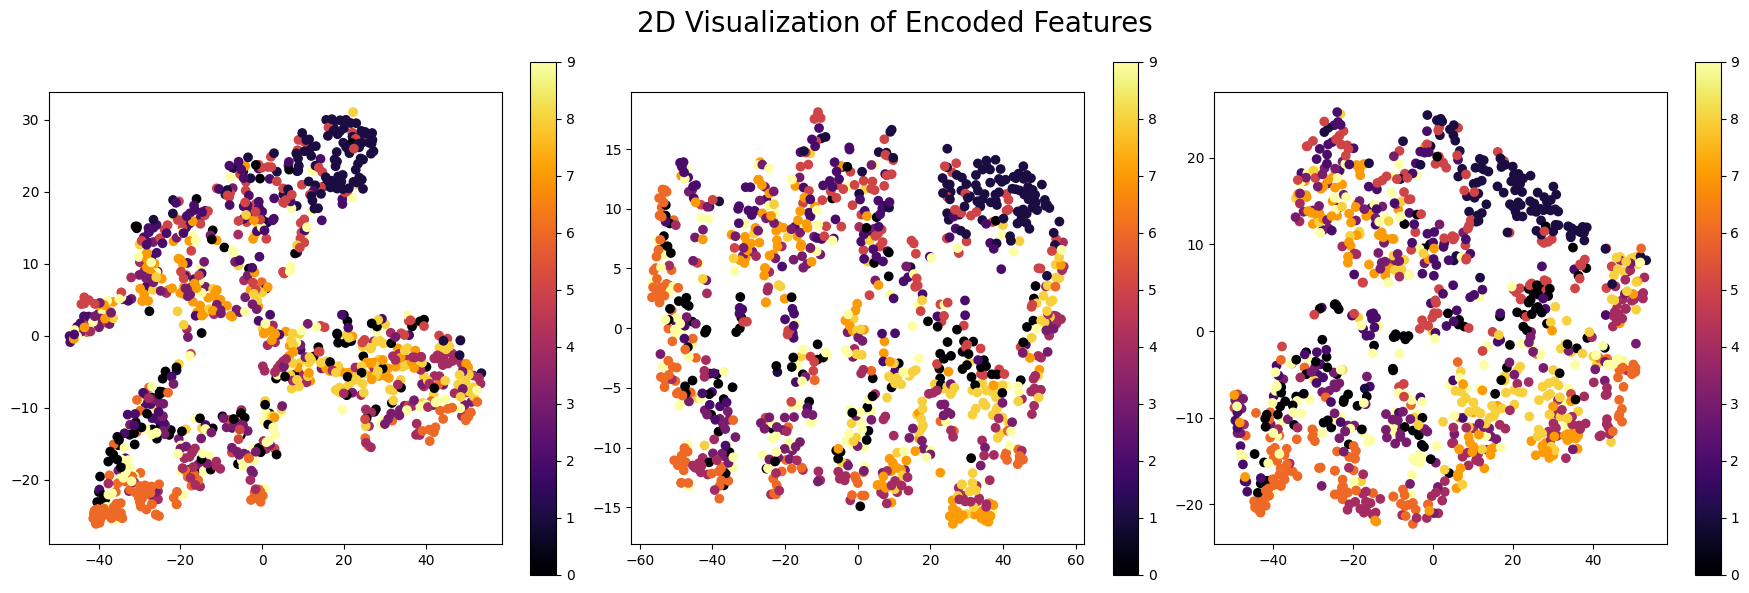

In [16]:
settings = (TestModel.ModelSettings(100, 64), TestModel.ModelSettings(100, 32), TestModel.ModelSettings(100, 16))
tm = TestModel(model_3, settings)
tm.test(X, X, validation_split=0.1, X_test=X, Y_test=Y, output_shape=20)

## Model 4

In [61]:
def model_4():
    input_shape=(130, 560)
    encoding_dim = 20
    
    # encoder
    input_layer = layers.Input(shape=input_shape)
    x = layers.Conv1D(32, 3, activation='relu', padding='same')(input_layer)
    x = layers.MaxPooling1D(2, padding='same')(x) # shape[0] // 2
    x = layers.Conv1D(64, 3, activation='relu', padding='same')(x)
    x = layers.MaxPooling1D(2, padding='same')(x) # shape[0] // 2
    x = layers.Conv1D(128, 3, activation='relu', padding='same')(x)
    x = layers.MaxPooling1D(2, padding='same')(x) # shape[0] // 2
    
    # 壓縮成 latent space
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    encoded = layers.Dense(encoding_dim, activation='relu')(x)
    
    # decoder
    x = layers.Dense(64, activation='relu')
    x = layers.Dense(128 * (input_shape[0] // 8 + 1), activation='relu')(encoded)
    x = layers.Reshape((input_shape[0] // 8 + 1, 128))(x)  # 恢復卷積形狀
    x = layers.Conv1DTranspose(128, 3, activation='relu', padding='same')(x)
    x = layers.UpSampling1D(2)(x)
    x = layers.Conv1DTranspose(64, 3, activation='relu', padding='same')(x)
    x = layers.UpSampling1D(2)(x)
    x = layers.Conv1DTranspose(32, 3, activation='relu', padding='same')(x)
    x = layers.UpSampling1D(2)(x)
    
    # 修正 shape
    x = layers.Cropping1D(cropping=(3, 3))(x)  # 將 shape 修正為 130, ...
    
    # 重構輸出
    decoded = layers.Conv1D(input_shape[1], 3, activation='sigmoid', padding='same')(x)
    
    encoder = models.Model(input_layer, encoded)
    autoencoder = models.Model(input_layer, decoded)
    return encoder, autoencoder

encoder, autoencoder = model_4()
autoencoder.summary()


Model: "functional_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 130, 560)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_40 (Conv1D)              │ (None, 130, 32)        │        53,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_24 (MaxPooling1D) │ (None, 65, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_41 (Conv1D)              │ (None, 65, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_25 (MaxPooling1D) │ (None, 33, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_42 (Conv1D)              │ (None, 33, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_26 (MaxPooling1D) │ (None, 17, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2176)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │       139,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 20)             │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 2176)           │        45,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_8 (Reshape)             │ (None, 17, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_transpose_24             │ (None, 17, 128)        │        49,280 │
│ (Conv1DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d_24 (UpSampling1D) │ (None, 34, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_transpose_25             │ (None, 34, 64)         │        24,640 │
│ (Conv1DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d_25 (UpSampling1D) │ (None, 68, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_transpose_26             │ (None, 68, 32)         │         6,176 │
│ (Conv1DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d_26 (UpSampling1D) │ (None, 136, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cropping1d_8 (Cropping1D)       │ (None, 130, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_43 (Conv1D)              │ (None, 130, 560)       │        54,320 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 405,444 (1.55 MB)

 Trainable params: 405,444 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

# Model - 1
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
# Model - 2
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
# Model - 3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


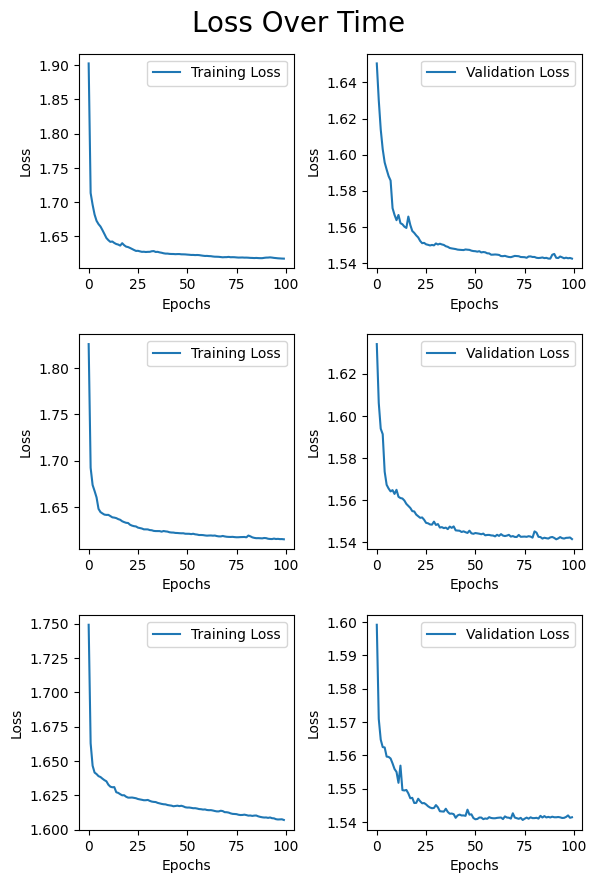

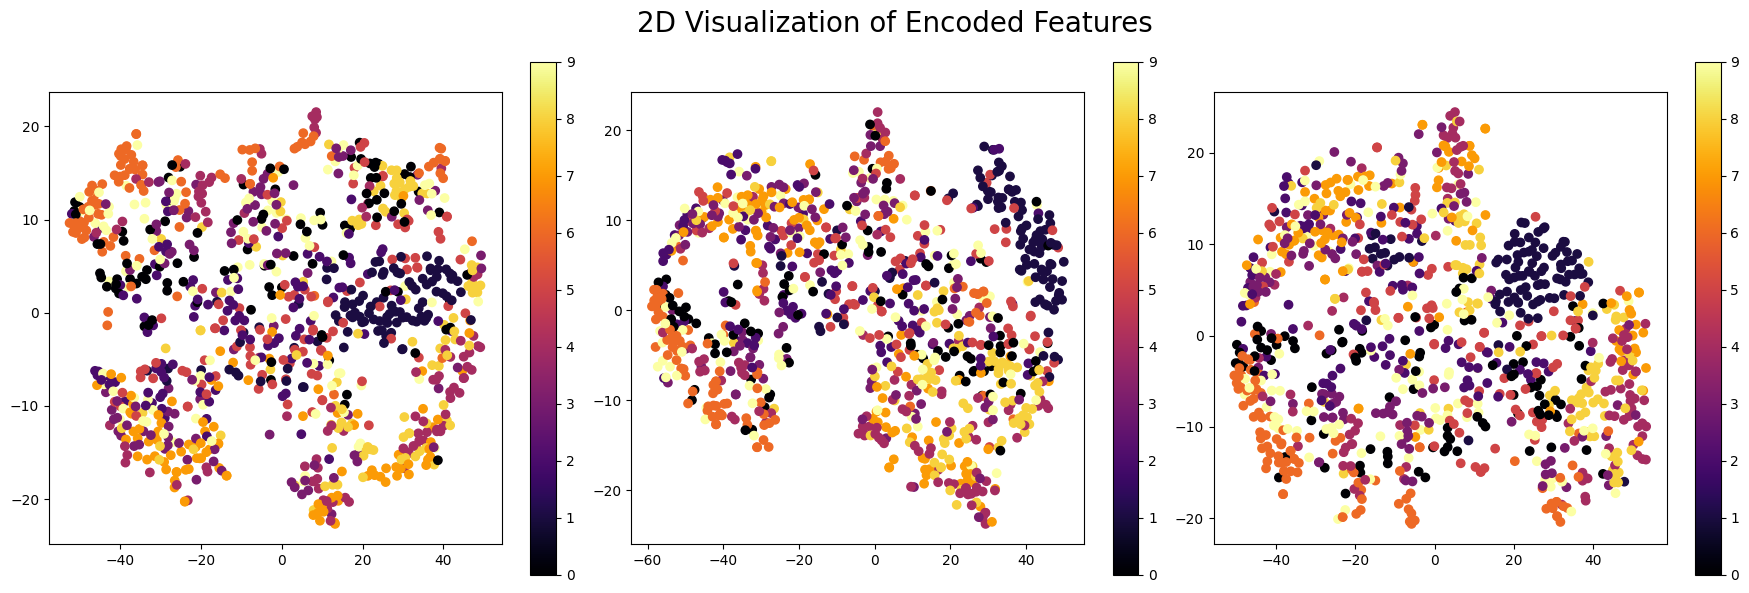

In [174]:
settings = (TestModel.ModelSettings(100, 64), TestModel.ModelSettings(100, 32), TestModel.ModelSettings(100, 16))
tm = TestModel(model_4, settings)
tm.test(X, X, validation_split=0.1, X_test=X, Y_test=Y, output_shape=20)

## Model 5

In [9]:
def model_5():
    input_shape = (130, 560)
    encoding_dim = 30
    
    # 編碼器
    input_layer = layers.Input(shape=input_shape)
    x = layers.Conv1D(32, 3, activation='relu', padding='same')(input_layer)
    x = layers.MaxPooling1D(2, padding='same')(x)  # shape[0] // 2 -> 65
    x = layers.Conv1D(64, 3, activation='relu', padding='same')(x)
    x = layers.MaxPooling1D(2, padding='same')(x)  # shape[0] // 2 -> 33
    x = layers.Conv1D(128, 3, activation='relu', padding='same')(x)
    x = layers.MaxPooling1D(2, padding='same')(x)  # shape[0] // 2 -> 17
    
    # 壓縮成 latent space
    x = layers.Conv1D(encoding_dim, 3, activation='relu', padding='same')(x)
    encoded = layers.GlobalMaxPooling1D()(x)
    
    # 解碼器
    x = layers.Dense(encoding_dim)(encoded)
    x = layers.Dense(17 * encoding_dim, activation='relu')(x)  # 將大小恢復
    x = layers.Reshape((17, encoding_dim))(x)  # 恢復到 (17, encoding_dim)
    x = layers.Conv1DTranspose(128, 3, activation='relu', padding='same')(x)
    x = layers.UpSampling1D(2)(x)  # shape -> 34
    x = layers.Conv1DTranspose(64, 3, activation='relu', padding='same')(x)
    x = layers.UpSampling1D(2)(x)  # shape -> 68
    x = layers.Conv1DTranspose(32, 3, activation='relu', padding='same')(x)
    x = layers.UpSampling1D(2)(x)  # shape -> 136
    
    # 修正 shape
    x = layers.Cropping1D(cropping=(3, 3))(x)  # 將形狀修正為 130
    
    # 重構輸出
    decoded = layers.Conv1D(input_shape[1], 3, activation='sigmoid', padding='same')(x)
    
    encoder = models.Model(input_layer, encoded)
    autoencoder = models.Model(input_layer, decoded)
    
    return encoder, autoencoder

encoder, autoencoder = model_5()
autoencoder.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 130, 560)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 130, 32)        │        53,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 65, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 65, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 33, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 33, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 17, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 17, 30)         │        11,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 30)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 510)            │        15,810 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 17, 30)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_transpose                │ (None, 17, 128)        │        11,648 │
│ (Conv1DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d (UpSampling1D)    │ (None, 34, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_transpose_1              │ (None, 34, 64)         │        24,640 │
│ (Conv1DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d_1 (UpSampling1D)  │ (None, 68, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_transpose_2              │ (None, 68, 32)         │         6,176 │
│ (Conv1DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d_2 (UpSampling1D)  │ (None, 136, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cropping1d (Cropping1D)         │ (None, 130, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 130, 560)       │        54,320 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209,778 (819.45 KB)

 Trainable params: 209,778 (819.45 KB)

 Non-trainable params: 0 (0.00 B)

# Model - 1
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
# Model - 2
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
# Model - 3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


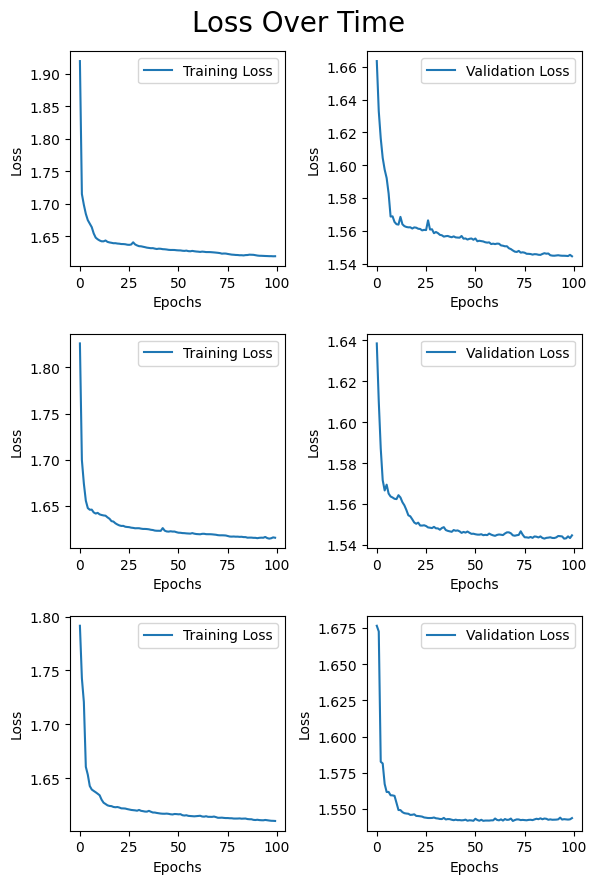

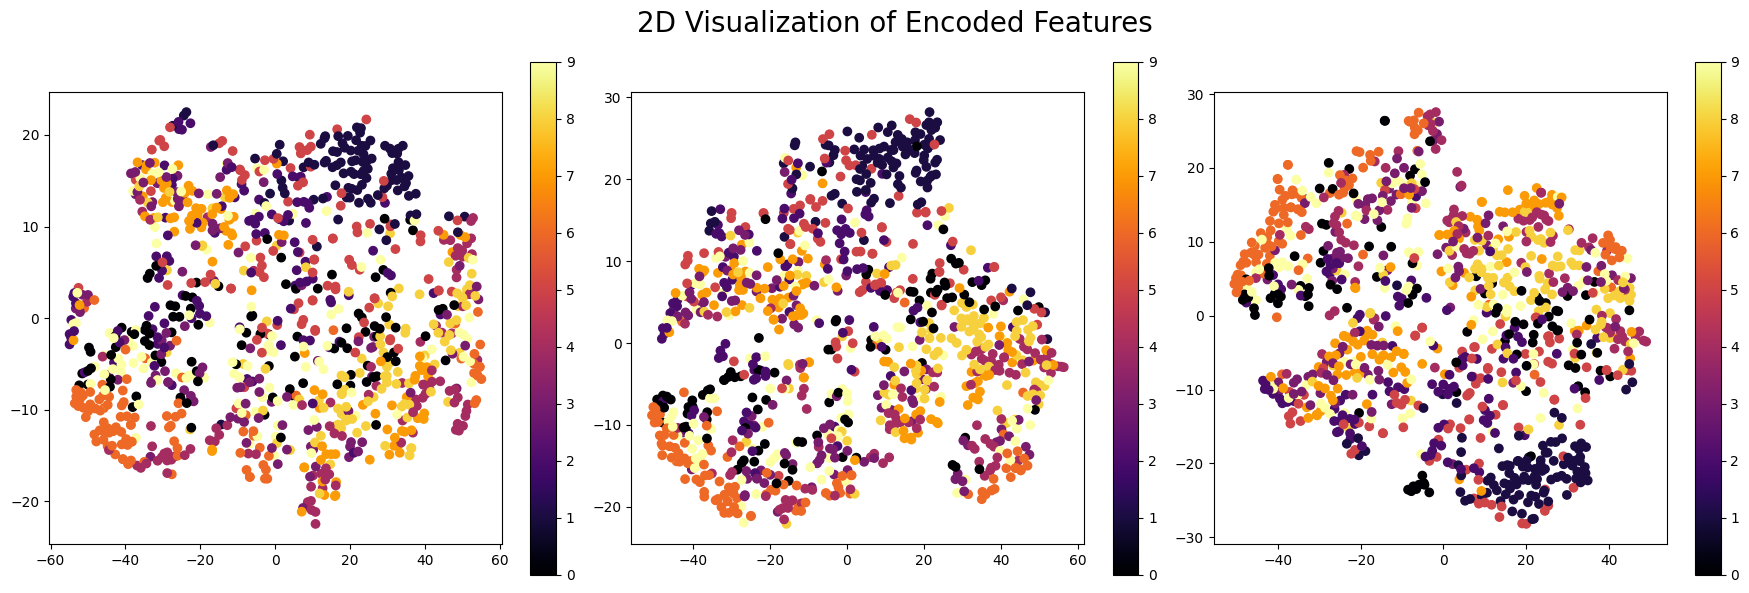

In [10]:
settings = (TestModel.ModelSettings(100, 64), TestModel.ModelSettings(100, 32), TestModel.ModelSettings(100, 16))
tm = TestModel(model_5, settings)
tm.test(X, X, validation_split=0.1, X_test=X, Y_test=Y, output_shape=30)

## Model 6

In [95]:
def model_6():
    input_shape = (130, 560)
    encoding_dim = 10
    
    # 編碼器
    input_layer = layers.Input(shape=input_shape)
    x = layers.Conv1D(32, 3, activation='relu', padding='same')(input_layer)
    x = layers.MaxPooling1D(2, padding='same')(x)  # shape[0] // 2 -> 65 * 32
    x = layers.Conv1D(64, 3, activation='relu', padding='same')(x)
    x = layers.MaxPooling1D(2, padding='same')(x)  # shape[0] // 2 -> 33 * 64
    x = layers.Conv1D(128, 3, activation='relu', padding='same')(x)
    x = layers.MaxPooling1D(2, padding='same')(x)  # shape[0] // 2 -> 17 * 128
    
    # 壓縮成 latent space
    x = layers.Conv1D(512, 3, activation='relu', padding='same')(x)
    x = layers.GlobalMaxPooling1D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    encoded = layers.Dense(encoding_dim, activation='relu')(x)
    
    # 解碼器
    x = layers.Dense(17*encoding_dim, activation='relu')(encoded)  # 將大小恢復
    x = layers.Reshape((17, encoding_dim))(x)  # 恢復到 (17, encoding_dim)
    x = layers.Conv1DTranspose(128, 3, activation='relu', padding='same')(x)
    x = layers.UpSampling1D(2)(x)  # shape -> 34
    x = layers.Conv1DTranspose(64, 3, activation='relu', padding='same')(x)
    x = layers.UpSampling1D(2)(x)  # shape -> 68
    x = layers.Conv1DTranspose(32, 3, activation='relu', padding='same')(x)
    x = layers.UpSampling1D(2)(x)  # shape -> 136
    
    # 修正 shape
    x = layers.Cropping1D(cropping=(3, 3))(x)  # 將形狀修正為 130
    
    # 重構輸出
    decoded = layers.Conv1D(input_shape[1], 3, activation='sigmoid', padding='same')(x)
    
    encoder = models.Model(input_layer, encoded)
    autoencoder = models.Model(input_layer, decoded)
    
    return encoder, autoencoder

encoder, autoencoder = model_6()
autoencoder.summary()


Model: "functional_65"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_31 (InputLayer)     │ (None, 130, 560)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_140 (Conv1D)             │ (None, 130, 32)        │        53,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_93 (MaxPooling1D) │ (None, 65, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_141 (Conv1D)             │ (None, 65, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_94 (MaxPooling1D) │ (None, 33, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_142 (Conv1D)             │ (None, 33, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_95 (MaxPooling1D) │ (None, 17, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_143 (Conv1D)             │ (None, 17, 512)        │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_22         │ (None, 512)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_119 (Dense)               │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_120 (Dense)               │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_121 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_122 (Dense)               │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_123 (Dense)               │ (None, 170)            │         1,870 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_31 (Reshape)            │ (None, 17, 10)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_transpose_78             │ (None, 17, 128)        │         3,968 │
│ (Conv1DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d_78 (UpSampling1D) │ (None, 34, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_transpose_79             │ (None, 34, 64)         │        24,640 │
│ (Conv1DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d_79 (UpSampling1D) │ (None, 68, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_transpose_80             │ (None, 68, 32)         │         6,176 │
│ (Conv1DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d_80 (UpSampling1D) │ (None, 136, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cropping1d_26 (Cropping1D)      │ (None, 130, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_144 (Conv1D)             │ (None, 130, 560)       │        54,32

 Total params: 710,024 (2.71 MB)

 Trainable params: 710,024 (2.71 MB)

 Non-trainable params: 0 (0.00 B)

# Model - 1
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
# Model - 2
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
# Model - 3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


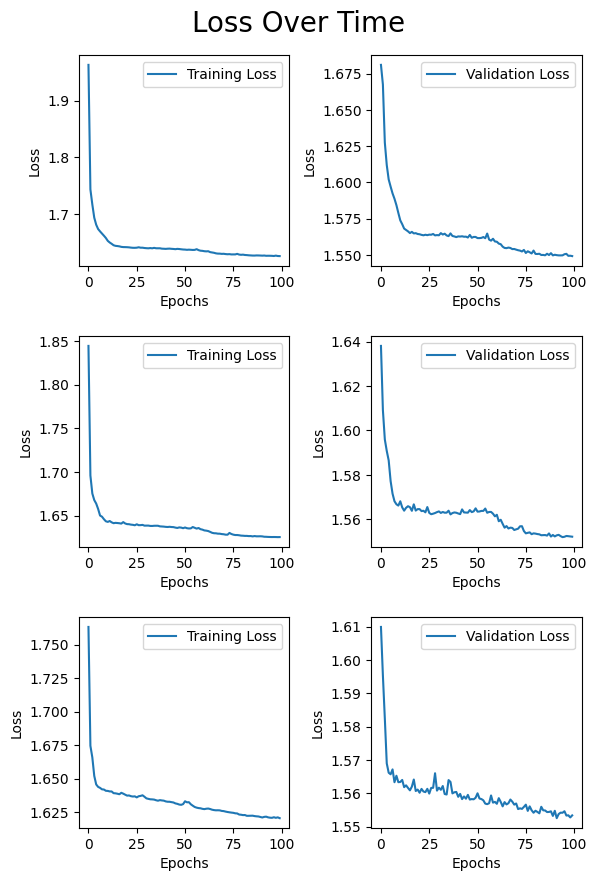

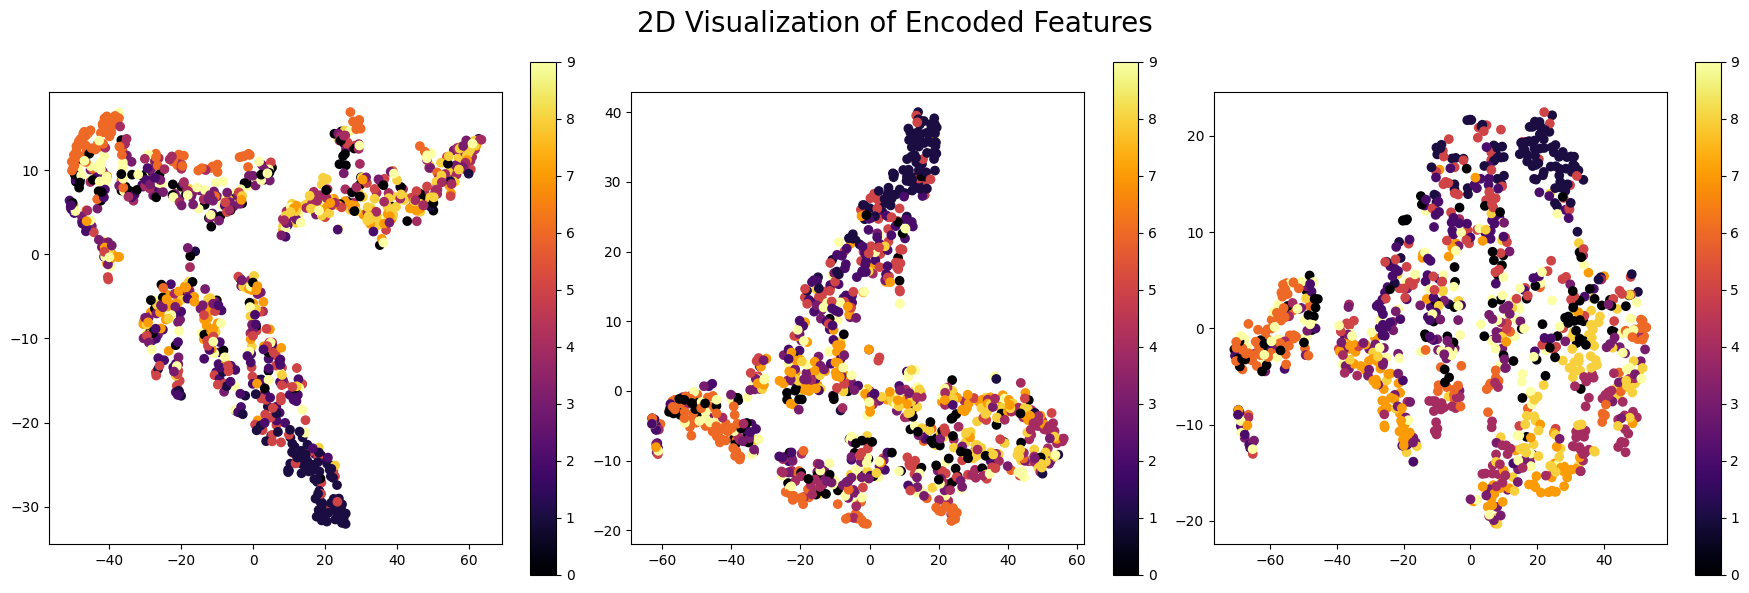

In [96]:
settings = (TestModel.ModelSettings(100, 64), TestModel.ModelSettings(100, 32), TestModel.ModelSettings(100, 16))
tm = TestModel(model_6, settings)
tm.test(X, X, validation_split=0.1, X_test=X, Y_test=Y, output_shape=10)

## Test

In [11]:
# X_test = np.expand_dims(X[0], 0)
# X_test.shape
# encoder.predict(X_test)

In [10]:
print(np.unique(Y))
print(Y.shape, X.shape)

['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
(1000,) (1000, 130, 560, 1)


In [97]:
encoder, autoencoder = model_6()
autoencoder.compile(optimizer='adam', loss='mse')
hist = autoencoder.fit(X, X, epochs=100, batch_size=64, validation_split=0.1)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 2.0484 - val_loss: 1.6762
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 1.7418 - val_loss: 1.6361
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 1.7132 - val_loss: 1.6172
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 1.6777 - val_loss: 1.6021
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 1.6692 - val_loss: 1.5961
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 1.6842 - val_loss: 1.5927
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 1.6671 - val_loss: 1.5905
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 1.6430 - val_loss: 1.5888
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 1.6378 - val_loss: 1.5849
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 1.6407 - val_loss: 1.5945
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 1.6681 - val_loss: 1.5858
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step

In [18]:
def encode_Y(Y):
    le = LabelEncoder()
    return le.fit_transform(Y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


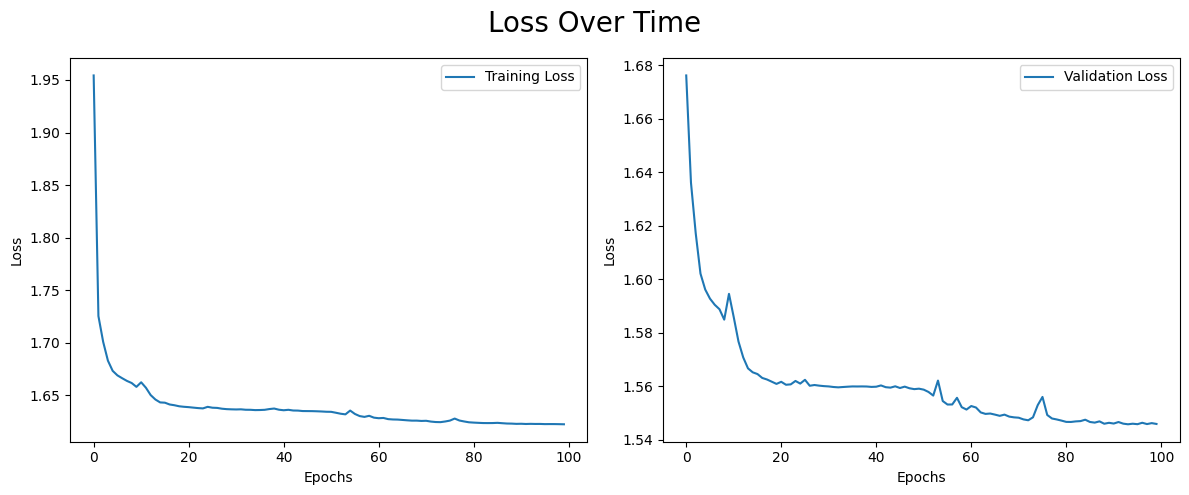

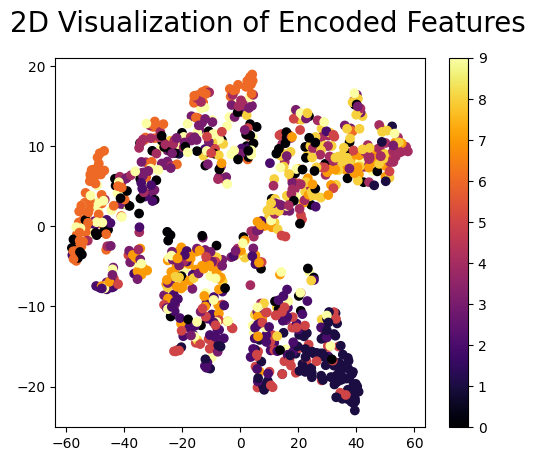

In [99]:
tm = TestModel(None, None)
tm._draw_loss(hist)
tm._draw_tsne(X, encode_Y(Y), encoder, output_shape=10)

In [41]:
def mfcc_to_X(filepath):
    audio = Audio(filepath=filepath, duration=30)
    _, _, mfcc = audio.get_mfcc(80, segment_size=10)
    mfcc = np.array(mfcc)
    mfcc = mfcc.transpose(2, 1, 0)
    mfcc = np.reshape(mfcc, (130, -1))
    mfcc = np.expand_dims(mfcc, axis=-1)
    mfcc = np.expand_dims(mfcc, axis=0)
    mfcc = np.nan_to_num(mfcc, nan = 0.)
    return mfcc
    
def get_features(filepath, encoder: models.Model):
    mfcc = mfcc_to_X(filepath)
    res = encoder.predict(mfcc)
    res = res.flatten()
    res = min_max_scaling(res)
    return res


In [64]:
def display_layers(X, encoder: models.Model):
    layer_outputs = [layer.output for layer in encoder.layers]
    activation_model = models.Model(inputs=encoder.input, outputs=layer_outputs)

    activations = activation_model.predict(X)

    # 打印每層的輸出，檢查是否有 NaN
    for layer_name, activation in zip([layer.name for layer in encoder.layers], activations):
        print(f"Layer {layer_name} has nan".ljust(40), "\t:", np.isnan(activation).any())
        
mfcc_X = mfcc_to_X(r"D:\Code\Music_score\src\data\music\download\AUDBVpvGAVs.mp3")
display_layers(mfcc_X, encoder)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Layer input_layer_9 has nan              	: False
Layer conv1d_44 has nan                  	: False
Layer max_pooling1d_27 has nan           	: False
Layer conv1d_45 has nan                  	: False
Layer max_pooling1d_28 has nan           	: False
Layer conv1d_46 has nan                  	: False
Layer max_pooling1d_29 has nan           	: False
Layer flatten_1 has nan                  	: False
Layer dense_20 has nan                   	: False
Layer dense_21 has nan                   	: False


In [100]:
features = np.array([
    get_features(r"D:\Code\Music_score\src\data\music\download\AUDBVpvGAVs.mp3", encoder),
    get_features(r"D:\Code\Music_score\src\data\music\download\H1Dvg2MxQn8.mp3", encoder),
    get_features(r"D:\Code\Music_score\src\data\music\download\pHlqEvAwdVc.mp3", encoder),
    get_features(r"D:\Code\Music_score\src\data\music\download\RhPX1bt0yWw.mp3", encoder),
    get_features(r"D:\Code\Music_score\src\data\music\download\shs0rAiwsGQ.mp3", encoder),
    get_features(r"D:\Code\Music_score\src\data\music\download\Z2IHNAjrnNI.mp3", encoder)
])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [101]:
print(features)

[[0.         0.7557749  0.5689976  0.553445   0.         1.
  0.         0.36038375 0.75304806 0.        ]
 [0.         0.7774267  0.54951197 0.5933659  0.         1.
  0.         0.38977984 0.805547   0.        ]
 [0.         0.7861481  0.53967977 0.6045326  0.         1.
  0.         0.3925988  0.82014674 0.        ]
 [0.         0.77742064 0.5553182  0.5697835  0.         1.
  0.         0.37604508 0.7998414  0.        ]
 [0.         0.77563584 0.55698025 0.5669123  0.         1.
  0.         0.37430295 0.798243   0.        ]
 [0.         0.74933946 0.5591434  0.54168504 0.         1.
  0.         0.31903547 0.70230883 0.        ]]


[[100.    99.87  99.78  99.93  99.94  99.9 ]
 [ 99.87 100.    99.99  99.98  99.97  99.6 ]
 [ 99.78  99.99 100.    99.95  99.94  99.48]
 [ 99.93  99.98  99.95 100.   100.    99.7 ]
 [ 99.94  99.97  99.94 100.   100.    99.71]
 [ 99.9   99.6   99.48  99.7   99.71 100.  ]]


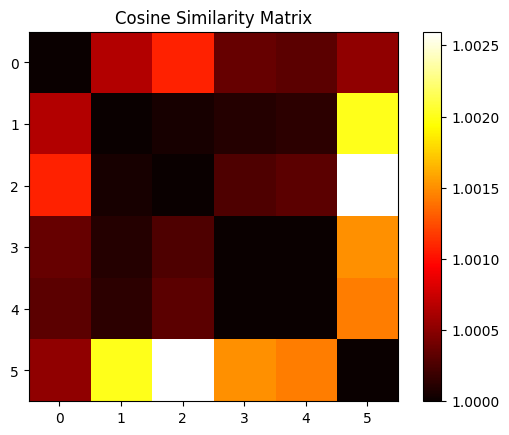

0 -> [4]
1 -> [2]
2 -> [1]
3 -> [4]
4 -> [3]
5 -> [0]


In [102]:
res = cosine_similarity(features)

exp_res = np.exp(1-res)
print(np.round(res**2 * 100, 2))

plt.imshow(exp_res, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title("Cosine Similarity Matrix")
plt.show()

for i, feature in enumerate(res):
    res[i][i] = 0
    print(f"{i} -> {np.where(res[i] == max(res[i]))[0]}")
    res[i][i] = 100

In [ ]:
print(np.unique(Y))
print(Y.shape, X.shape)

['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
(1000,) (1000, 130, 560, 1)
